# Mini Project 3

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**

The code below provides a visual representation of how the Black-Scholes **call option** price changes with respect to time.

**a)** Use the visualization to interpret how the *rate of change* of the Black-Scholes call option price behaves as time progresses.

**b)** Create a separate graphic to visualize how the *rate of change* of the Black-Scholes call option price depends on the spot price $S(0)$.

**c)** Repeat parts **a** and **b** for **put option** prices.

**d)** Use the space below to record your observations and reflections based on the generated plots.

---

### Observations:

- *Call Option – Time Sensitivity:* Increases monotonically with a rate that decreases with time.  
- *Call Option – Spot Price Sensitivity:* At long times,  the call option pricing exhibits very similar behaviour as their spot prices. We observe an interesting behaviour of the rate of change of call pricing as a function of time for different spot pricing although the long time behaviour is independent of spot pricing. For S0 away from K, we observe a behaviour where the rate is maximized at some intermediate time while for S0 close to K, then the rate decreases continuously from an intial high value.  
- *Put Option – Time Sensitivity:* Increases in a convex fashion with a rate that decreases concavely. Finally reaches a constant value after a long time.
- *Put Option – Spot Price Sensitivity:* We observe a behaviour which is distinct from the call prices. At long times, the put prices saturate to the same value regardless of their spot pricings. We observe an interesting behaviour of the rate of change of put pricing as a function of time for different spot pricing although the long time behaviour is independent of spot pricing. For S0 away from K, we observe a behaviour where the rate is maximized at some intermediate time while for S0 close to K, then the rate decreases continuously from an intial high value. The behaviour is exactly the same as in call pricing.

[np.float64(0.6222115097837548), np.float64(2.262217235545336), np.float64(3.6547047666972503), np.float64(4.860647041667896), np.float64(5.935727706617364), np.float64(6.913714881598885), np.float64(7.816213713838351), np.float64(8.657909007870835), np.float64(9.449284791688875), np.float64(10.198123599824065), np.float64(10.91038606273898), np.float64(11.590755297968322), np.float64(12.242989292253462), np.float64(12.870157744829534), np.float64(13.474806408170352), np.float64(14.059074270236245), np.float64(14.624779099894461), np.float64(15.173481190609799), np.float64(15.7065317223814), np.float64(16.225110043752103), np.float64(16.7302528240236), np.float64(17.22287714109391), np.float64(17.70379897799525), np.float64(18.173748196456394), np.float64(18.633380774099358), np.float64(19.083288892493513), np.float64(19.524009320002868), np.float64(19.956030428941176), np.float64(20.37979810946858), np.float64(20.79572078508817), np.float64(21.204173691119003), np.float64(21.605502544

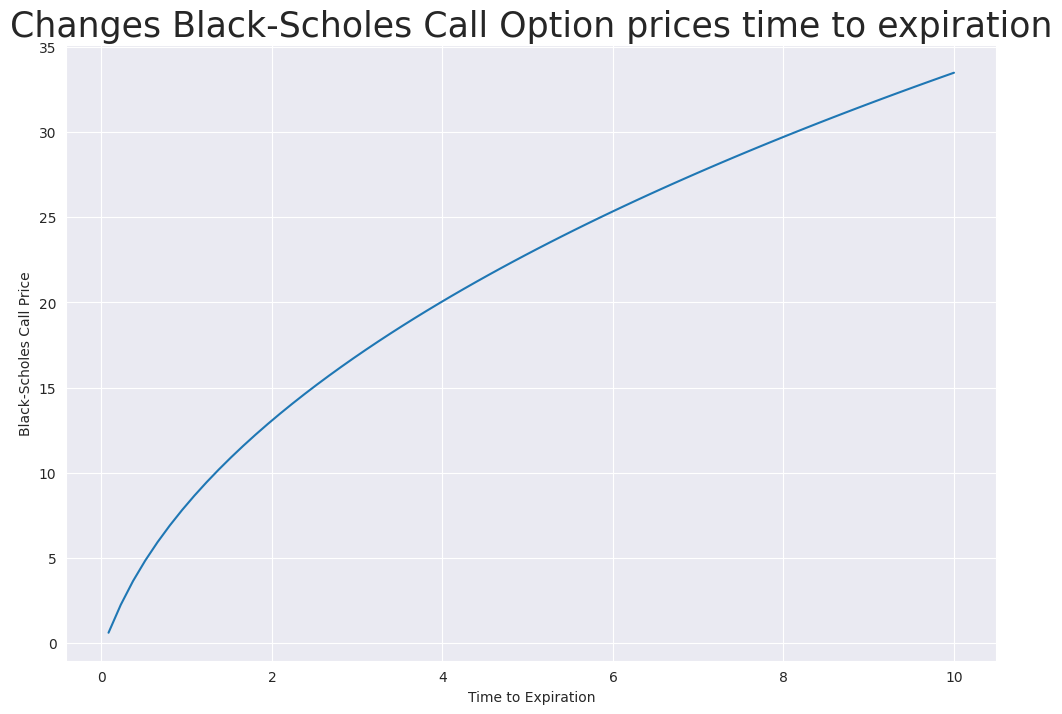

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sns
sns.set_style('darkgrid')

def bs_call(S0, K, sigma, t=1, r=0):
    """
    Description:

    Computes the Black-Scholes value of a European call option.

    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate

    Returns:
        Call option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return S0*norm.cdf(d1)-K*np.exp(-r*t)*norm.cdf(d2)


def bs_put(S0, K, sigma, t=1, r=0):
    """
    Description:

    Computes the Black-Scholes value of a European put option.

    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate

    Returns:
        Put option price
    """

    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return -S0*norm.cdf(-d1)+K*np.exp(-r*t)*norm.cdf(-d2)


S0 = 100
K = 110
sigma = .3
times = np.linspace(1/12, 10, 70)

call_prices = [bs_call(S0,K,sigma, t = times[i]) for i in range(len(times))]

print(call_prices)
plt.figure(figsize = (12,8))
plt.title('Changes Black-Scholes Call Option prices time to expiration', size = 25)
plt.plot(times, call_prices)
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Call Price')
plt.show()

From this plot, we can see that the rate of change of call option pricing starts very high and it keeps reducing with time at an increasing rate until the rate becomes zero and the price remains constant. The above plot is shown when the risk free interest rate = 0. If r is increased, the call option price saturates much sooner. Now, let us plot the time derivative of the option pricing to verify that this observation is true.  

Visualizing the rate of change of Black Scholes call option pricing

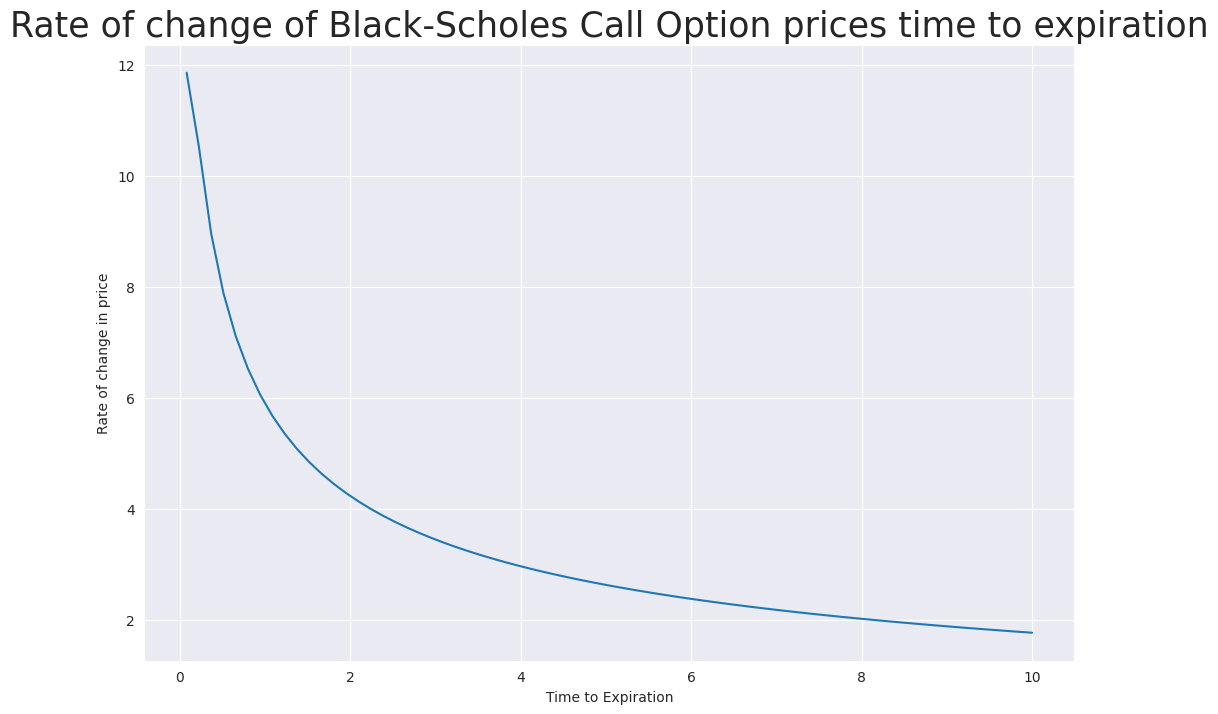

In [ ]:
def der_bs_call(S0, K, sigma, t = 1, r=0):
    """
    Description:

    Computes the time derivative of Black-Scholes value of a European call option.

    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        T: Time to expiration (in years)
        r: Risk-free interest rate
        t: time

    Returns:
        Call option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    dd1dt = (r+0.5*sigma**2)/(sigma*np.sqrt(t)) - (((r+0.5*sigma**2)*t)/(2*sigma*t**(3/2)))
    dd2dt = dd1dt - (sigma)/(2*t**(1/2))
    return S0*norm.pdf(d1)*dd1dt - K*np.exp(-r*t)*norm.pdf(d2)*dd2dt + K*r*np.exp(-r*t)*norm.cdf(d2)

S0 = 100
K = 110
sigma = .3
times = np.linspace(1/12, 10, 70)

der_call_prices = [der_bs_call(S0,K,sigma, t = times[i]) for i in range(len(times))]


plt.figure(figsize = (12,8))
plt.title('Rate of change of Black-Scholes Call Option prices time to expiration', size = 25)
plt.plot(times, der_call_prices)
plt.xlabel('Time to Expiration')
plt.ylabel('Rate of change in price')
plt.show()

Indeed, we see what we had expected! Now, let us understand the dependance on the Spot price. Let us plot the call opting price as a function of time for some different spot prices with all other parameters kept constant.



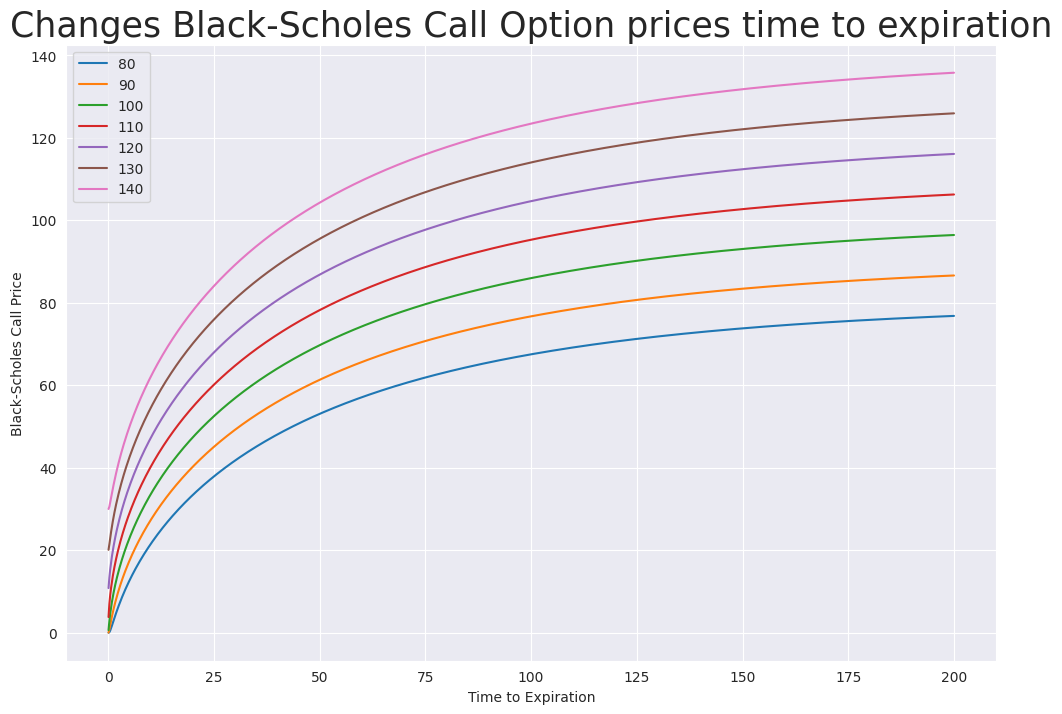

In [ ]:
S = np.array([80,90,100,110,120,130,140])
K = 110
sigma = .3
times = np.linspace(1/12, 200, 1000)
plt.figure(figsize = (12,8))
plt.title(' Black-Scholes Call Option prices time to expiration for different spot pricing', size = 25)
for S0 in S:
  call_prices = [bs_call(S0,K,sigma, t = times[i]) for i in range(len(times))]
  plt.plot(times, call_prices,label = str(S0))
plt.legend()
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Call Price')
plt.show()

We can see that at long times, the call option pricing exhibits very similar behaviour as their spot prices.



Now, let us do the same thing for the rate of change of pricing.

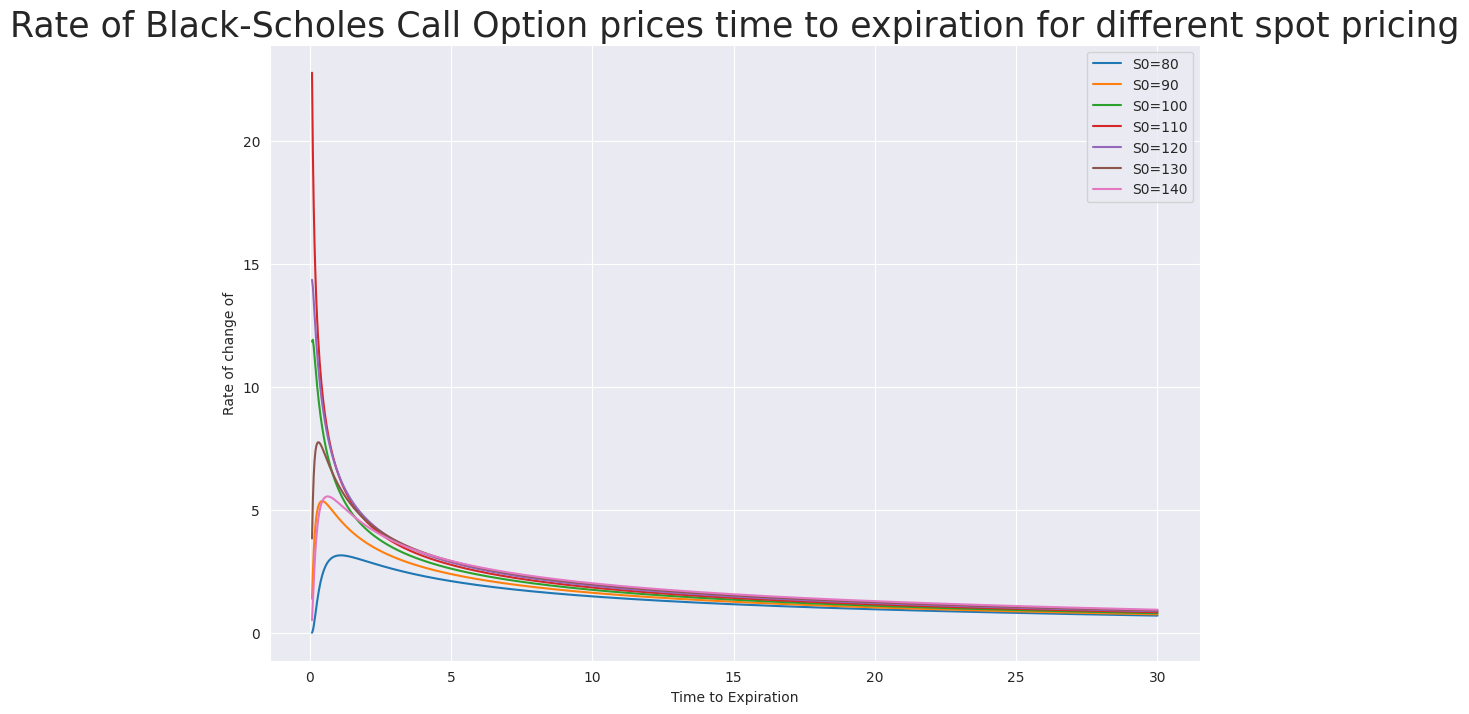

In [ ]:
S = np.array([80,90,100,110,120,130,140])
K = 110
sigma = .3
times = np.linspace(1/12, 30, 1000)
plt.figure(figsize = (12,8))
plt.title('Rate of Black-Scholes Call Option prices time to expiration for different spot pricing', size = 25)
for S0 in S:
  der_call_prices = [der_bs_call(S0,K,sigma, t = times[i]) for i in range(len(times))]
  plt.plot(times, der_call_prices,label ="S0=" + str(S0))
plt.legend()
plt.xlabel('Time to Expiration')
plt.ylabel('Rate of change of pricing')
plt.show()

We observe an interesting behaviour of the rate of change of call pricing as a function of time for different spot pricing although the long time behaviour is independent of spot pricing. For S0 away from K, we observe a behaviour where the rate is maximized at some intermediate time while for S0 close to K, then the rate decreases continuously from an intial high value.

**Put option analysis**

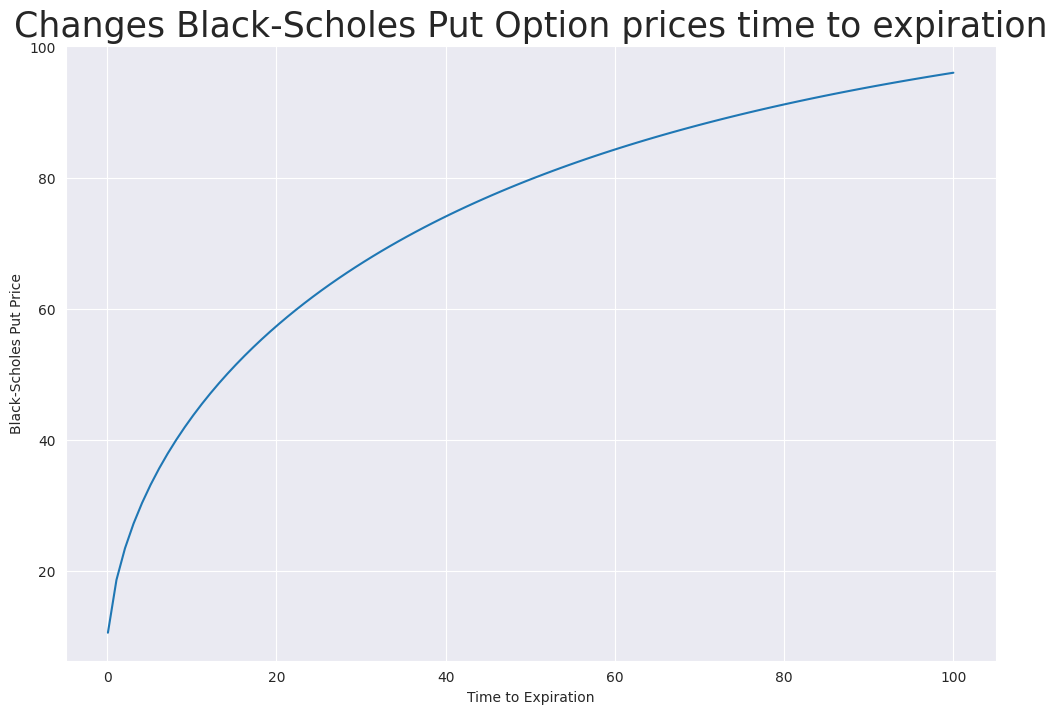

In [ ]:
S0 = 100
K = 110
sigma = .3
times = np.linspace(1/12, 100, 100)

put_prices = [bs_put(S0,K,sigma, t = times[i]) for i in range(len(times))]

plt.figure(figsize = (12,8))
plt.title('Changes Black-Scholes Put Option prices time to expiration', size = 25)
plt.plot(times, put_prices)
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Put Price')
plt.show()

Observing Put-Call parity

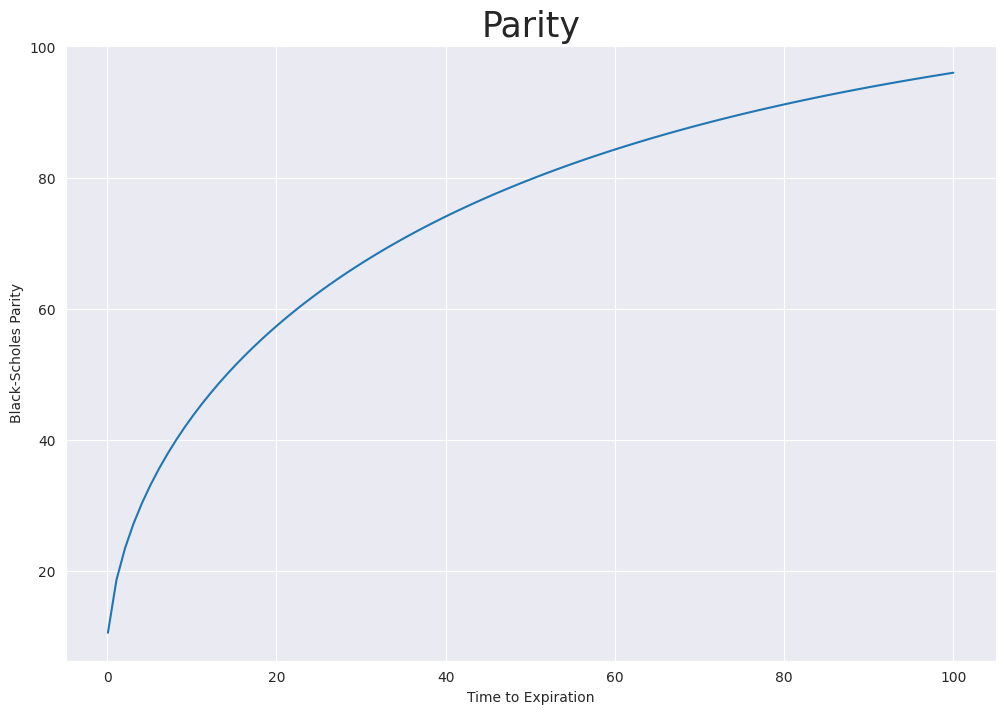

In [ ]:
S0 = 100
K = 110
sigma = .3
times = np.linspace(1/12, 100, 100)

parity = [(bs_call(S0,K,sigma, t = times[i])  - bs_put(S0,K,sigma, t = times[i])) for i in range(len(times))]

plt.figure(figsize = (12,8))
plt.title('Parity', size = 25)
plt.plot(times, put_prices)
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Parity')
plt.show()

Rate of change of put pricing

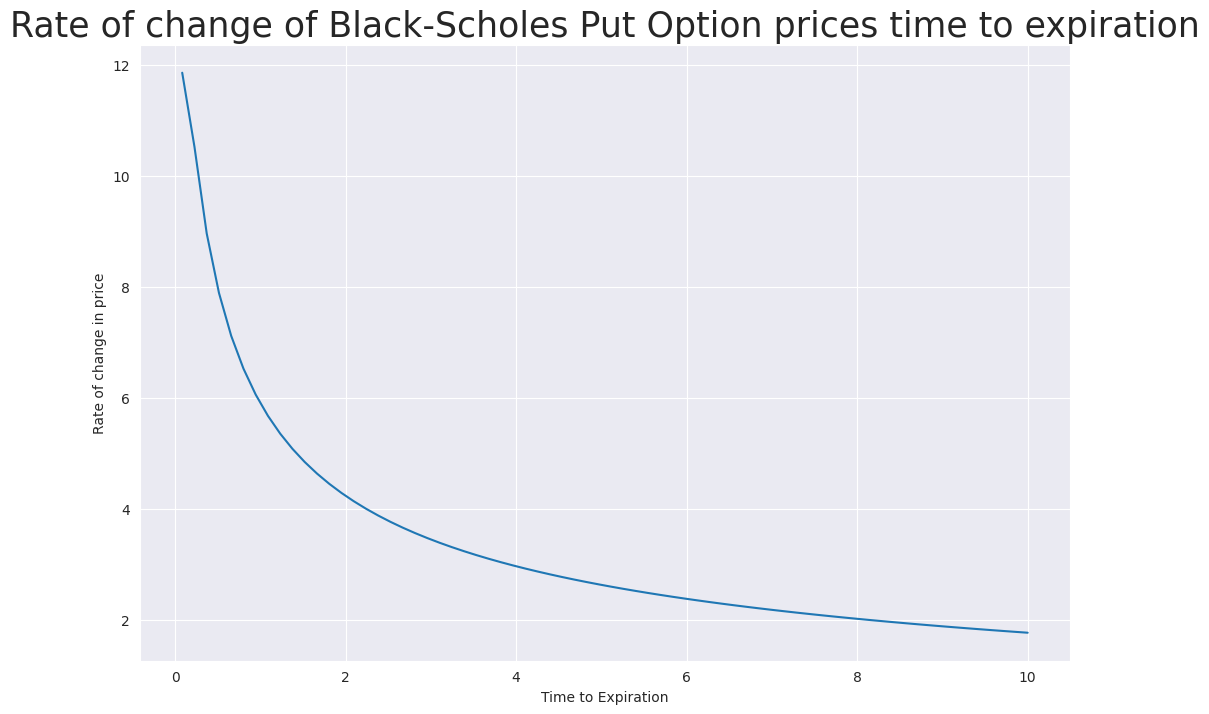

In [ ]:
def der_bs_put(S0, K, sigma, t = 1, r=0):
    """
    Description:

    Computes the time derivative of Black-Scholes value of a European call option.

    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        T: Time to expiration (in years)
        r: Risk-free interest rate
        t: time

    Returns:
        Put option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    dd1dt = (r+0.5*sigma**2)/(sigma*np.sqrt(t)) - (((r+0.5*sigma**2)*t)/(2*sigma*t**(3/2)))
    dd2dt = dd1dt - (sigma)/(2*t**(1/2))
    return -S0*norm.pdf(-d1)*-1*dd1dt + K*np.exp(-r*t)*norm.pdf(-d2)*-1*dd2dt - K*r*np.exp(-r*t)*norm.cdf(-d2)

S0 = 100
K = 110
sigma = .3
times = np.linspace(1/12, 10, 70)

der_put_prices = [der_bs_put(S0,K,sigma, t = times[i]) for i in range(len(times))]


plt.figure(figsize = (12,8))
plt.title('Rate of change of Black-Scholes Put Option prices time to expiration', size = 25)
plt.plot(times, der_put_prices)
plt.xlabel('Time to Expiration')
plt.ylabel('Rate of change in price')
plt.show()

Dependance on spot pricing

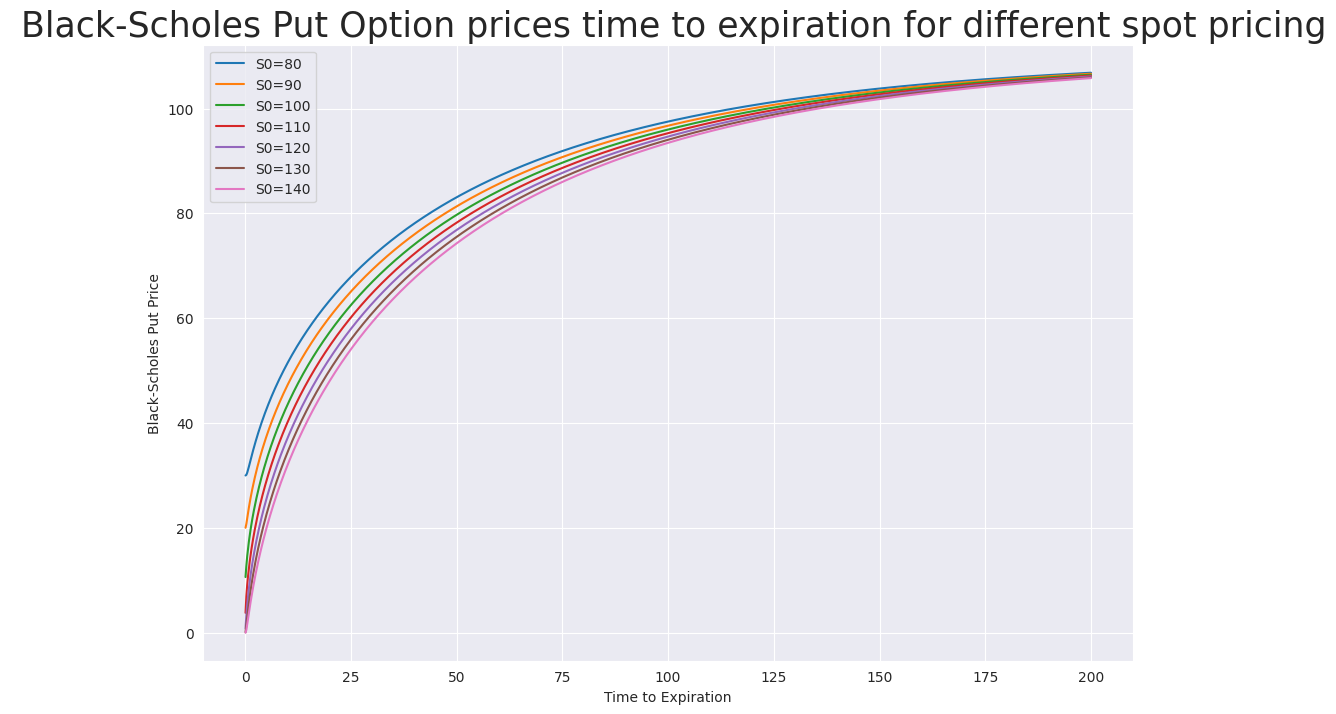

In [ ]:
S = np.array([80,90,100,110,120,130,140])
K = 110
sigma = .3
times = np.linspace(1/12, 200, 1000)
plt.figure(figsize = (12,8))
plt.title(' Black-Scholes Put Option prices time to expiration for different spot pricing', size = 25)
for S0 in S:
  put_prices = [bs_put(S0,K,sigma, t = times[i]) for i in range(len(times))]
  plt.plot(times, put_prices,label = "S0="+str(S0))
plt.legend()
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Put Price')
plt.show()

We observe a behaviour which is distinct from the call prices. At long times, the put prices saturate to the same value regardless of their spot pricings. Now let us observe the behaviour of the rate of change of put prices.

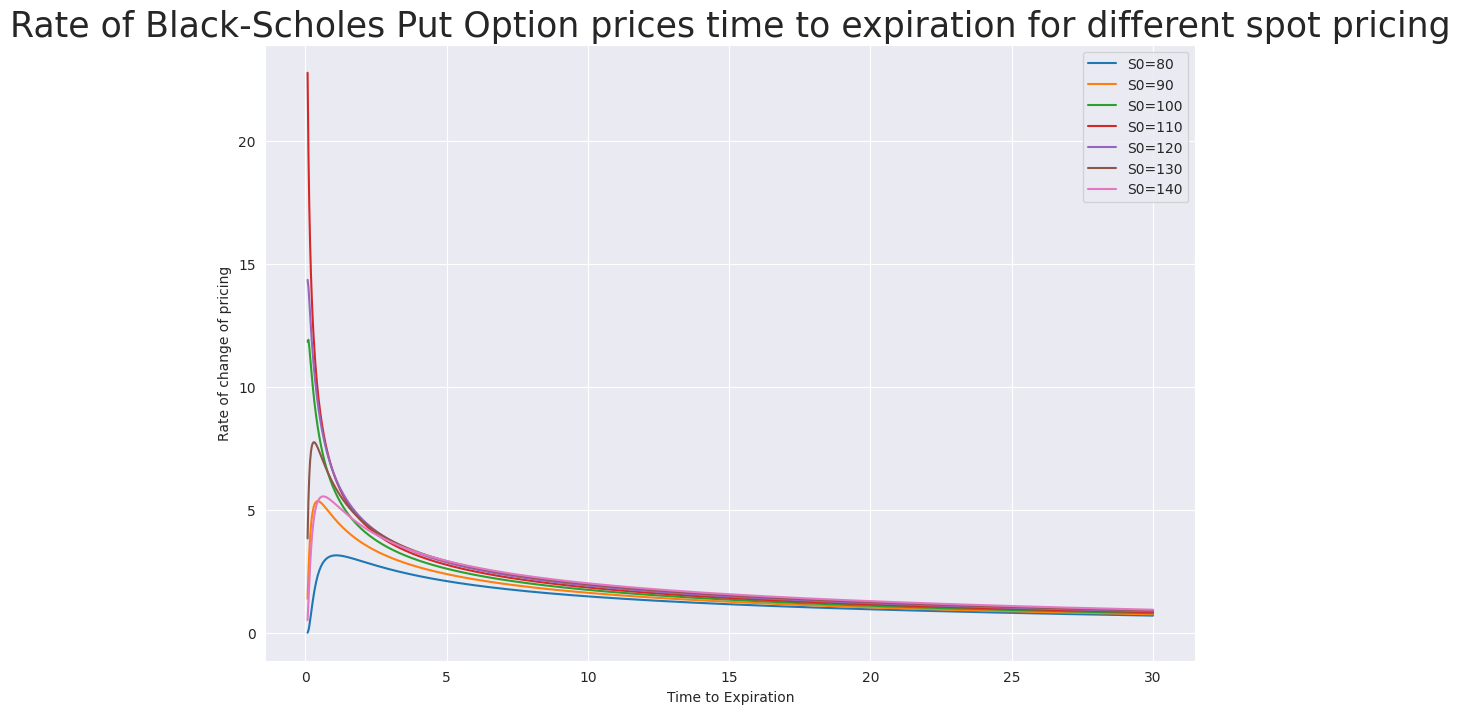

In [ ]:
S = np.array([80,90,100,110,120,130,140])
K = 110
sigma = .3
times = np.linspace(1/12, 30, 1000)
plt.figure(figsize = (12,8))
plt.title('Rate of Black-Scholes Put Option prices time to expiration for different spot pricing', size = 25)
for S0 in S:
  der_put_prices = [der_bs_put(S0,K,sigma, t = times[i]) for i in range(len(times))]
  plt.plot(times, der_put_prices,label ="S0=" + str(S0))
plt.legend()
plt.xlabel('Time to Expiration')
plt.ylabel('Rate of change of pricing')
plt.show()

We observe an interesting behaviour of the rate of change of put pricing as a function of time for different spot pricing although the long time behaviour is independent of spot pricing. For S0 away from K, we observe a behaviour where the rate is maximized at some intermediate time while for S0 close to K, then the rate decreases continuously from an intial high value.